# LOG6302A — Analyse d’applications et Cyber-sécurité<br>Laboratoire #3

**Quentin Guidée (2206809), Nam Vu (2230468)**

Polytechnique Montréal – Hiver 2024


In [5]:
import tempfile

from code_analysis import CFG, CFGReader, Graph
from graphviz import Source
from IPython.display import Image
from main import DefinitelyReachablePTFA, DefinitelyReachingPTFA

cfg_reader = CFGReader()


def show_graph(graph: Graph):
    """Utilitaire pour afficher les graphes dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    with tempfile.NamedTemporaryFile(suffix=".png") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))

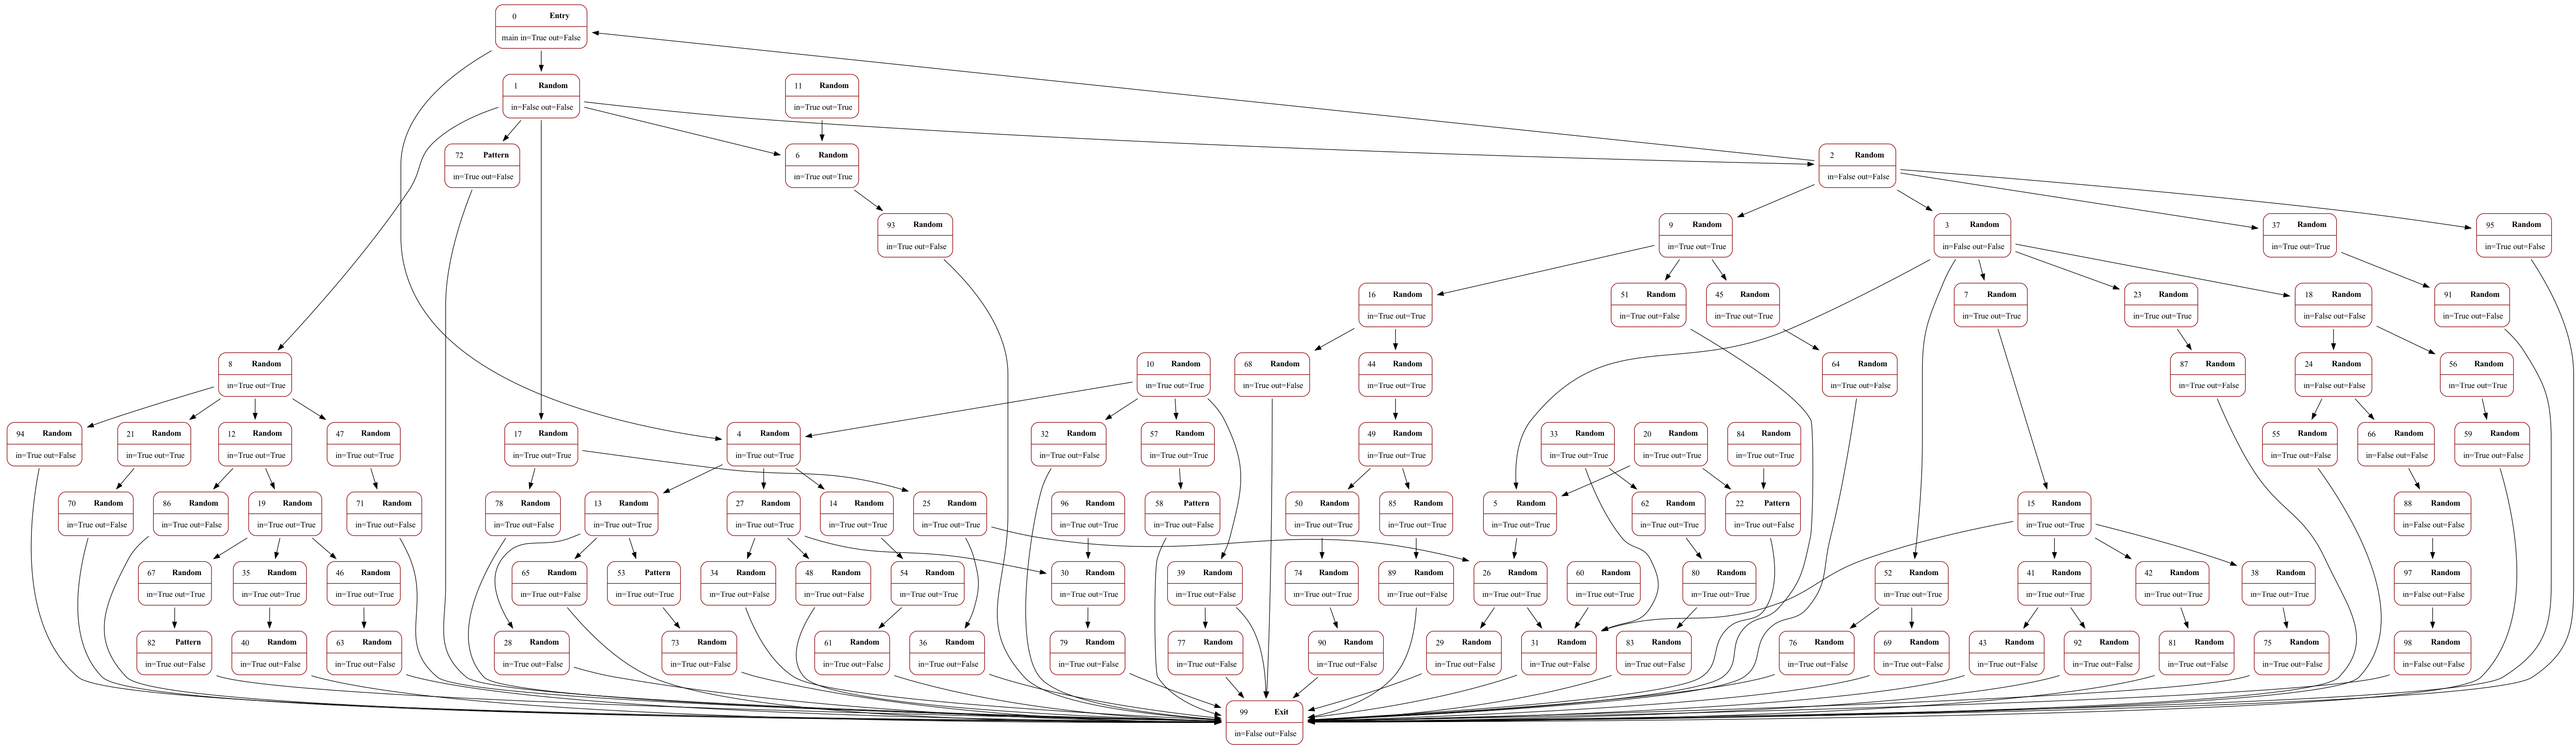

In [2]:
def check_pattern(cfg: CFG, nid: int) -> bool:
    return cfg.get_type(nid) == "Pattern"


cfg = cfg_reader.read_cfg("../tp/perf/graph1.cfg.json")
ptfa = DefinitelyReachablePTFA(cfg)
in_dict, out_dict = ptfa(check_pattern)

for nid in cfg.get_node_ids():
    cfg.set_image(
        nid, f"{cfg.get_image(nid) or ''} in={in_dict[nid]} out={out_dict[nid]}"
    )

show_graph(cfg)

In [9]:
def check_pattern(cfg: CFG, nid: int) -> bool:
    return cfg.get_image(nid) == "use_db"


cfg = cfg_reader.read_cfg("../tp/part_2/wp-db.php.cfg.json")
ptfa = DefinitelyReachingPTFA(cfg)
in_dict, out_dict = ptfa(check_pattern)

for nid in cfg.get_node_ids():
    cfg.set_image(
        nid, f"{cfg.get_image(nid) or ''} in={in_dict[nid]} out={out_dict[nid]}"
    )

show_graph(cfg)